# Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import (precision_recall_curve, PrecisionRecallDisplay)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Helper Functions and Column Definitions

#### Load in data for specific year 


In [2]:
def load_df (year):
    
    # dynamic column name 
    columns_var_name = f'columns_{year}'
    
    columns = globals()[columns_var_name]
    
    # file name for specified year
    file_name = f'LLCP{year}.xpt'
    
    # read in data for year
    df = pd.read_sas(file_name, format="xport")
    
    df = df[columns] 
    df.columns = simplified_names
    
    # create global variable
    df_name = f'df{year}'
    
    globals()[df_name] = df

#### Remove irrelevant answers to questions (ex. "Don't know / Refused to answer")

In [3]:
def remove_values(df, col, *arg):
    for val in arg:
        df = df[df[col] != val]
    return df

#### Display ROC curve and AUC

In [72]:
def display_roc(true, probabilities):

    fpr, tpr, thresholds = metrics.roc_curve(true, probabilities)
    auc = metrics.roc_auc_score(true, probabilities)

    plt.plot(fpr,tpr, label="AUC="+str(auc))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.show()

#### Display confusion matrix

In [73]:
def display_confusion(true, pred): 
    
    conf_matrix = confusion_matrix(y_true = true, y_pred = pred)
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', xticklabels=["No", "Yes"], yticklabels= ["No", "Yes"], cmap = "Blues")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

#### Calculate metrics to help assess performance of models


In [69]:
def calc_metrics (actual, pred):
    acc = accuracy_score(actual, pred)
    prec = precision_score(actual,pred)
    recall = recall_score(actual, pred)
    f1 = f1_score(actual, pred)
    x = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": recall,
        "F1-Score": f1
        }
    
    for metric, value in x.items():
        print(f"{metric}: {value}")

#### Fit model, predict, and display ROC curve, confusion matrix, and important metrics 

In [74]:
def evaluate(model, xtrain, ytrain, xval, yval):
    
    model.fit(xtrain, ytrain)
    labels = model.predict(xval)
    probs = model.predict_proba(xval)
    pos_probs = probs [:, 1]
    
    display_roc(yval, pos_probs)
    display_confusion(yval, labels)
    calc_metrics(yval, labels)

#### Initializing list of column names to keep

In [5]:
columns_2018 = ["SEX1", "_AGE_G", "_AGE65YR", "_RACE", "_URBSTAT", "_EDUCAG",
    "MARITAL", "VETERAN3", "EMPLOY1", "_CHLDCNT", "HTIN4", "DEAF", "BLIND",
    "HLTHPLN1", "MEDCOST", "CHECKUP1", "DRNKANY5", "MARIJAN1", "SMOKE100",
    "_TOTINDA", "PHYSHLTH", "DIFFWALK", "_BMI5CAT", "WTKG3", "_ASTHMS1",
    "ADDEPEV2", "_RFHLTH", "_MENT14D", "_MICHD", "CVDSTRK3", "CHCSCNCR",
    "CHCCOPD1", "CHCKDNY1", "_DRDXAR1", "DIABETE3"]

columns_2019 = ["SEXVAR", "_AGE_G", "_AGE65YR", "_RACE", "_URBSTAT", "_EDUCAG",
    "MARITAL", "VETERAN3", "EMPLOY1", "_CHLDCNT", "HTIN4", "DEAF", "BLIND",
    "HLTHPLN1", "MEDCOST", "CHECKUP1", "DRNKANY5", "MARIJAN1", "SMOKE100",
    "_TOTINDA", "PHYSHLTH", "DIFFWALK", "_BMI5CAT", "WTKG3", "_ASTHMS1",
    "ADDEPEV3", "_RFHLTH", "_MENT14D", "_MICHD", "CVDSTRK3", "CHCSCNCR",
    "CHCCOPD2", "CHCKDNY2", "_DRDXAR2", "DIABETE4"]

columns_2020 = ["SEXVAR", "_AGE_G", "_AGE65YR", "_RACE", "_URBSTAT", "_EDUCAG",
    "MARITAL", "VETERAN3", "EMPLOY1", "_CHLDCNT", "HTIN4", "DEAF", "BLIND",
    "HLTHPLN1", "MEDCOST", "CHECKUP1", "DRNKANY5", "MARIJAN1", "SMOKE100",
    "_TOTINDA", "PHYSHLTH", "DIFFWALK", "_BMI5CAT", "WTKG3", "_ASTHMS1",
    "ADDEPEV3", "_RFHLTH", "_MENT14D", "_MICHD", "CVDSTRK3", "CHCSCNCR",
    "CHCCOPD2", "CHCKDNY2", "_DRDXAR2", "DIABETE4"]

columns_2021 = ["SEXVAR", "_AGE_G", "_AGE65YR", "_RACE", "_URBSTAT", "_EDUCAG",
    "MARITAL", "VETERAN3", "EMPLOY1", "_CHLDCNT", "HTIN4", "DEAF", "BLIND",
    "_HLTHPLN", "MEDCOST1", "CHECKUP1", "DRNKANY5", "MARIJAN1", "SMOKE100",
    "_TOTINDA", "PHYSHLTH", "DIFFWALK", "_BMI5CAT", "WTKG3", "_ASTHMS1",
    "ADDEPEV3", "_RFHLTH", "_MENT14D", "_MICHD", "CVDSTRK3", "CHCSCNCR",
    "CHCCOPD3", "CHCKDNY2", "_DRDXAR3", "DIABETE4"]

columns_2022 = ["SEXVAR", "_AGE_G", "_AGE65YR", "_RACE1", "_URBSTAT", "_EDUCAG",
    "MARITAL", "VETERAN3", "EMPLOY1", "_CHLDCNT", "HTIN4", "DEAF", "BLIND",
    "_HLTHPLN", "MEDCOST1", "CHECKUP1", "DRNKANY6", "MARIJAN1", "SMOKE100",
    "_TOTINDA", "PHYSHLTH", "DIFFWALK", "_BMI5CAT", "WTKG3", "_ASTHMS1",
    "ADDEPEV3", "_RFHLTH", "_MENT14D", "_MICHD", "CVDSTRK3", "CHCSCNC1",
    "CHCCOPD3", "CHCKDNY2", "_DRDXAR2", "DIABETE4"]

simplified_names = ["Sex", "Age", "Elder", "Race", "Urban",
    "Education", "Marital", "Veteran", "Employment", "Kids_Household", "Height",
    "Deaf", "Blind", "Healthcare", "No_Doc_Cost", "Check_Up", "Alcohol",
    "Marijuana", "Cigarettes", "Physical_Activity", "Physical_Health",
    "Diff_Walking", "BMI", "Weight", "Asthma", "Depression",
    "General_Health", "Mental_Health", "CHD_MI", "Stroke", "Skin_Cancer",
    "COPD", "Kidney_Disease", "Arthritis", "Diabetes"]

# Preparation

#### Load data

In [6]:
%cd C:\Users\hanis\OneDrive\Portfolio Projects\diabetes\data
    
# each year will have separate dataframe
for i in range(2018,2023):
    load_df(i)

C:\Users\hanis\OneDrive\Portfolio Projects\diabetes\data


C:\Users\hanis\anaconda3\lib\site-packages\pandas\io\sas\sas_xport.py:475: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[x] = v


#### Sanity check

In [7]:
df2022.head(2)

,Sex,Age,Elder,Race,Urban,Education,Marital,Veteran,Employment,Kids_Household,...,Depression,General_Health,Mental_Health,CHD_MI,Stroke,Skin_Cancer,COPD,Kidney_Disease,Arthritis,Diabetes
0,2.0,6.0,2.0,1.0,1.0,4.0,1.0,2.0,7.0,1.0,...,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
1,2.0,6.0,2.0,1.0,1.0,2.0,3.0,2.0,2.0,1.0,...,2.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0


#### Combine all years into one dataframe

In [8]:
df = pd.concat([df2018, df2019, df2020, df2021, df2022])
df.shape

(2141487, 35)

#### Remove responses with no value

In [9]:
bad_answers = {"Sex": [7,9], "Elder": [3], "Race": [6,9], "Education": [9], "Marital": [9], "Veteran": [9], "Employment": [9],
               "Kids_Household": [9], "Deaf": [9], "Blind": [9], "Healthcare": [7,9], "No_Doc_Cost": [7,9], "Check_Up": [7,9],
               "Alcohol": [7,9], "Marijuana": [77,99], "Cigarettes": [7,9], "Physical_Activity": [9], "Physical_Health": [77,99], "Diff_Walking": [7,9],
               "Asthma": [9], "Depression": [7,9], "General_Health": [9], "Mental_Health": [9], "Stroke": [7,9], "Skin_Cancer": [7,9],
               "COPD": [7,9], "Kidney_Disease": [7,9], "Diabetes": [2,4,7,9]}

for key, val in bad_answers.items():
    for answer in val:
        df = remove_values(df, key, answer)

#### Sanity check

In [10]:
#"COPD" column should not have any rows with 7 or 9 

df["COPD"].value_counts()

2.0    1535251
1.0     129505
Name: COPD, dtype: int64

#### Dealing with nulls

In [11]:
df.isnull().sum().sort_values(ascending = False).head(10)

Marijuana          1194791
BMI                  88217
Weight               68070
Urban                32006
Height               31456
CHD_MI               10976
Arthritis             6166
No_Doc_Cost            712
Check_Up               712
Physical_Health         16
dtype: int64

In [12]:
# Lot of nulls for Marijuana, so drop column ... we have enough data to do this

df.drop(columns = ["Marijuana"], inplace = True)

In [13]:
# Drop all subjects with any null values ... we have enough data to do this

df.dropna(inplace = True)
df.isnull().sum().sort_values(ascending = False).head(10)

Sex                0
General_Health     0
Physical_Health    0
Diff_Walking       0
BMI                0
Weight             0
Asthma             0
Depression         0
Mental_Health      0
Age                0
dtype: int64

# Attribute Correlation

In [14]:
corr = df.corr()
corr = corr > 0.3

In [15]:
# Too many columns, only want visualization to include attributes with at least one correlation > 0.3
to_keep = []
for col in (corr.sum(axis=1) > 1).index:
    if (corr.sum(axis=1) > 1)[col] == True:
        to_keep.append(col)

In [16]:
final_corr = df[to_keep].corr()

<AxesSubplot:>

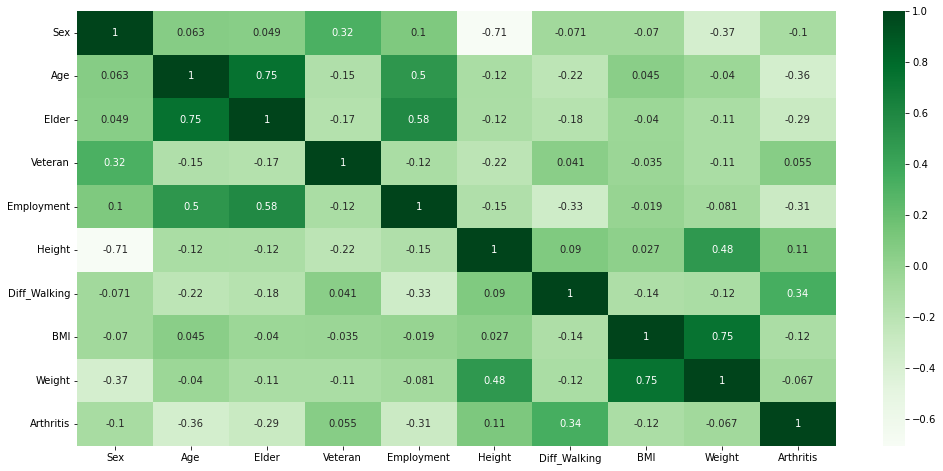

In [17]:
plt.figure(figsize=(17,8))
sns.heatmap(final_corr, annot = True, cmap = "Greens")

Notable correlations between
- (Weight, BMI) - 0.75
-(Age, Elder) - 0.75 
-(Sex, Height) - 0.71 
-(Employment, Elder) - 0.58
-(Age, Employment) - 0.5
-(Weight, Height) - 0.48

Deciding to drop BMI, Elder, and Height

In [18]:
df.drop(columns = ["BMI", "Elder", "Height"], inplace = True)

# Train/Test Split

#### Separating independent variables from dependent variable

In [19]:
X = df.drop(columns = ["Diabetes"])
y = df["Diabetes"]
X.shape, y.shape

((1521628, 30), (1521628,))

#### Creating training set with 70% of subjects, validation set with 15%, test set with 15%

In [38]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [40]:
X_train.shape, y_train.shape

((1065139, 30), (1065139,))

In [41]:
X_val.shape, y_val.shape

((228244, 30), (228244,))

In [42]:
X_test.shape, y_test.shape

((228245, 30), (228245,))

# Scaling

#### Attributes will have mean = 0 and standard deviation = 1

In [43]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_val_sc = sc.transform(X_val)
X_test_sc = sc.transform(X_test)

#### Sanity Check

In [44]:
X_train_sc[0]

array([-1.04699475,  0.37175928, -0.40239089, -0.41617784, -0.06422892,
        1.64050897,  0.37592895, -0.26392776, -0.50315647,  0.21642431,
        0.14272443, -0.25690529, -3.33774622,  1.81647005,  1.09449588,
       -1.18102241, -0.54680956,  0.72090964, -2.38412749, -0.05796413,
        0.38178508, -2.02808819, -0.43688806, -0.68953956,  0.30838261,
        0.20520581, -3.04641906, -3.42529892,  0.20303484, -1.41901991])

In [45]:
X_test_sc[0]

array([-1.04699475, -2.12782841, -0.40239089, -0.41617784, -0.06422892,
        1.64050897,  0.37592895, -0.61509744, -0.50315647,  0.21642431,
        0.14272443,  3.89248504, -3.33774622, -0.42046729, -0.91366265,
        0.84672398, -0.54680956,  0.72090964,  0.41944066,  0.8058398 ,
        0.38178508,  0.49307521, -0.43688806, -0.68953956,  0.30838261,
        0.20520581,  0.32825425,  0.29194532,  0.20303484,  0.70471175])

#### Target variable -- either 0 (absence of diabetes) or 1 (presence of diabetes)

In [46]:
y_test.value_counts()

3.0    197013
1.0     31232
Name: Diabetes, dtype: int64

In [47]:
y_train.value_counts()

3.0    919378
1.0    145761
Name: Diabetes, dtype: int64

In [48]:
y_train[y_train==3] = 0
y_val[y_val==3] = 0
y_test[y_test==3] = 0

#### Sanity Check

In [49]:
y_test.value_counts()

0.0    197013
1.0     31232
Name: Diabetes, dtype: int64

In [53]:
y_train.value_counts()

0.0    919378
1.0    145761
Name: Diabetes, dtype: int64

# Principal Component Analysis (PCA)

In [54]:
pca = PCA()
pca.fit(X_train_sc)

PCA()

In [55]:
eigenvalues = pca.explained_variance_
x_axis = np.arange(1, len(eigenvalues) + 1, step = 1)

Text(0.5, 1.0, 'Scree Plot')

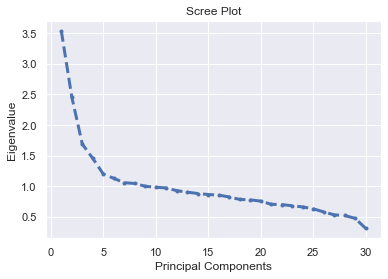

In [56]:
sns.set_theme(style = "darkgrid")
plt.plot(x_axis,eigenvalues, label = 'line1', color='b', linestyle='--', marker='.', linewidth=3,)
plt.xlabel("Principal Components")
plt.ylabel("Eigenvalue")
plt.title("Scree Plot")

Elbow at 5 principal components... explained variance levels off with increasing principal components

Deciding to keep first 5 PC's

In [57]:
X_train_pca = pca.transform(X_train_sc)[:, :5]
X_val_pca = pca.transform(X_val_sc)[:, :5]
X_test_pca = pca.transform(X_test_sc)[:, :5]

In [59]:
X_train_pca.shape, X_val_pca.shape, X_test_pca.shape

((1065139, 5), (228244, 5), (228245, 5))

# Baseline Models

#### Logistic Regression - Baseline

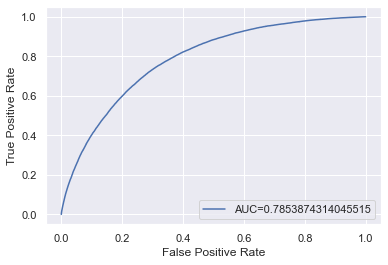

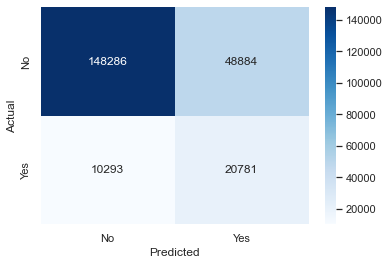

Accuracy: 0.7407292196070872
Precision: 0.29829900236847773
Recall: 0.6687584475767523
F1-Score: 0.4125710995741471


In [77]:
lr = LogisticRegression(solver = "lbfgs", penalty = "l2", class_weight = 'balanced')

evaluate(lr, X_train_pca, y_train, X_val_pca, y_val)

#### AdaBoost - Baseline

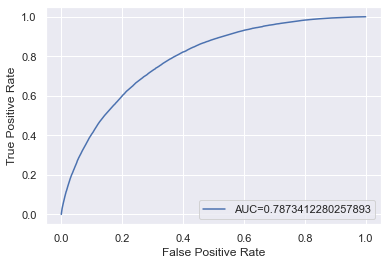

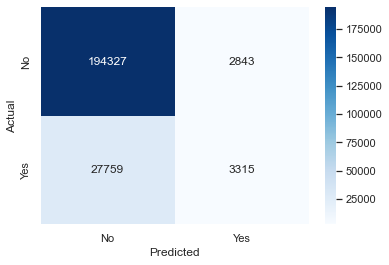

Accuracy: 0.8659241863970137
Precision: 0.5383241312114323
Recall: 0.1066808264143657
F1-Score: 0.17807262569832402


In [78]:
ada = AdaBoostClassifier(n_estimators=40, random_state=0)
evaluate(ada, X_train_pca, y_train, X_val_pca, y_val)

#### Random Forest - Baseline

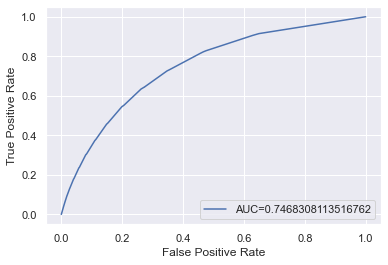

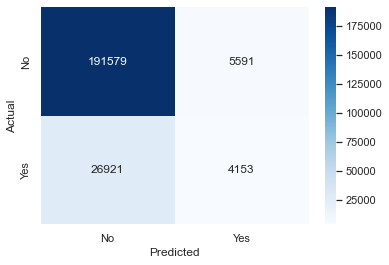

Accuracy: 0.8575559488967947
Precision: 0.4262110016420361
Recall: 0.13364870953208471
F1-Score: 0.20348865696506446


In [79]:
rf = RandomForestClassifier(n_estimators = 20, random_state=0)
evaluate(rf, X_train_pca, y_train, X_val_pca, y_val)

Looking at the confusion matrices, the baseline models are predicting the negative class the majority of the time because of the class imbalance. This is yielding strong accuracy, which is misleading. 

Undersampling will be done now to see whether more balanced models can be achieved.  

** Note: Hyperparameter tuning is limited due to computational limitations. Unable to do gridsearch due to long runtime for 20 estimators. With more resources, I would have checked the different combinations of hyperparamters for an optimal model, instead of tuning one hyperparameter at a time. In addition, K-fold cross-validation would have been done to prevent overfitting on a specific validation set.

# Undersampling

In [80]:
y.value_counts()

3.0    1313561
1.0     208067
Name: Diabetes, dtype: int64

In [81]:
# As we see, the positive class represents only ~14% of the subjects
# Random Undersampling is done, utilizing sampling without replacement, to select subjects from the majority class that will be removed

rus = RandomUnderSampler(random_state=1)
X1, y1 = rus.fit_resample(X,y)

In [83]:
X_train, X_temp, y_train, y_temp = train_test_split(X1, y1, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

As we see, the positive class represents only ~14% of the subjects

Random Undersampling performs sampling without replacement to select subjects from the majority class that will be removed

In [84]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

In [82]:
y1.value_counts()

1.0    208067
3.0    208067
Name: Diabetes, dtype: int64

In [85]:
y_train.value_counts()

3.0    145751
1.0    145542
Name: Diabetes, dtype: int64

In [86]:
y_train[y_train==3] = 0
y_val[y_val==3] = 0
y_test[y_test==3] = 0

In [87]:
pca = PCA()
pca.fit(X_train)

PCA()

In [88]:
X_train = pca.transform(X_train)[:, :5]
X_val = pca.transform(X_val)[:, :5]
X_test = pca.transform(X_test)[:, :5]

#### Logistic Regression - Undersampling

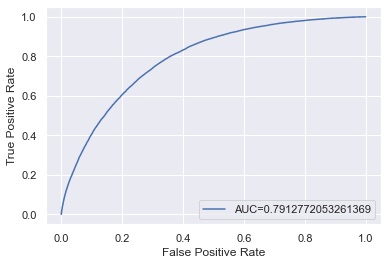

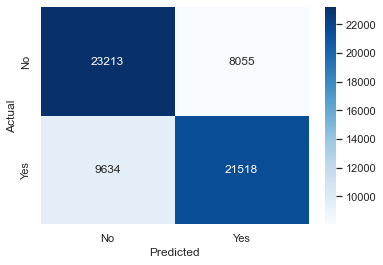

Accuracy: 0.7166132649791733
Precision: 0.7276231697832483
Recall: 0.6907421674370827
F1-Score: 0.7087031700288186


In [90]:
lr = LogisticRegression(solver = "lbfgs", penalty = "l2")
evaluate(lr, X_train, y_train, X_val, y_val)

#### AdaBoost - Undersampling

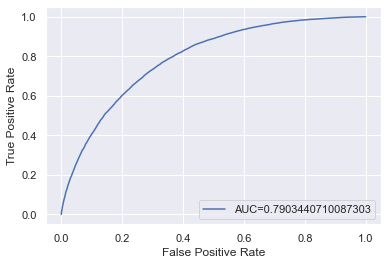

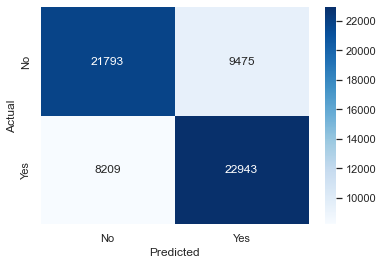

Accuracy: 0.7166933675104133
Precision: 0.707724103892899
Recall: 0.7364856189008732
F1-Score: 0.7218184678307377


In [92]:
ada = AdaBoostClassifier(n_estimators=40, random_state=0)
evaluate(ada, X_train, y_train, X_val, y_val)

#### Random Forests - Undersampling

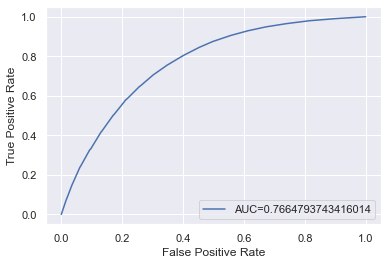

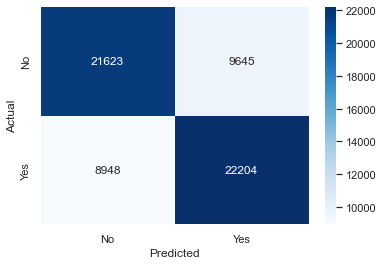

Accuracy: 0.7021307273309837
Precision: 0.6971647461458759
Recall: 0.7127632254750899
F1-Score: 0.7048777003539627


In [93]:
rf = RandomForestClassifier(n_estimators = 20, random_state=0)
evaluate(rf, X_train, y_train, X_val, y_val)

Undersampling provides much more balanced models that perform equally well for a variety of metrics 

Healthy confusion matrix

Confusion matrices look healthy as well, since the models are no longer simply predicting the negative class for most subjects

AUC of logistic regression and AdaBoost classifiers are better than the random forest's. This implies that if the threshold for classification is adjusted, perhaps better performance can be achieved. However, simply assessing the default 0.5 threshold, AdaBoost would be preferred due to the increased importance recall has over precision in this particular study. More on this later.

# Oversampling

In [121]:
y.value_counts()

3.0    1313561
1.0     208067
Name: Diabetes, dtype: int64

In [124]:
# SMOTE synthesizes new samples by creating examples that are close in the feature space to the subjects in the underrepresented class

sm = SMOTE(sampling_strategy = 'minority', random_state=42)
X1 , y1 = sm.fit_resample(X, y)

In [125]:
X_train, X_temp, y_train, y_temp = train_test_split(X1, y1, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [126]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

In [127]:
y_train[y_train==3] = 0
y_val[y_val==3] = 0
y_test[y_test==3] = 0

In [96]:
X_train, X_temp, y_train, y_temp = train_test_split(X1, y1, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [128]:
pca = PCA()
pca.fit(X_train)

PCA()

In [129]:
X_train = pca.transform(X_train)[:, :5]
X_val = pca.transform(X_val)[:, :5]
X_test = pca.transform(X_test)[:, :5]

#### Logistic Regression -- Oversampling

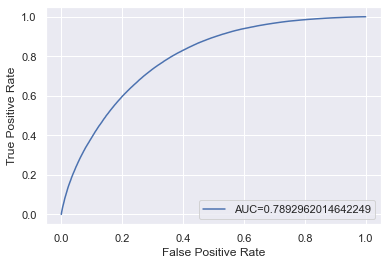

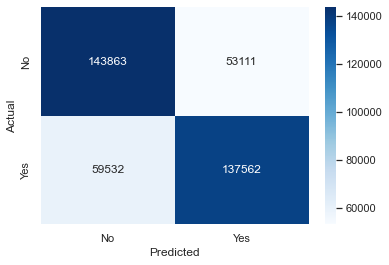

Accuracy: 0.7141533948455596
Precision: 0.7214550565628065
Recall: 0.6979512313921277
F1-Score: 0.7095085450799063


In [130]:
lr = LogisticRegression(solver = "lbfgs", penalty = "l2")
evaluate(lr, X_train, y_train, X_val, y_val)

#### AdaBoost -- Oversampling

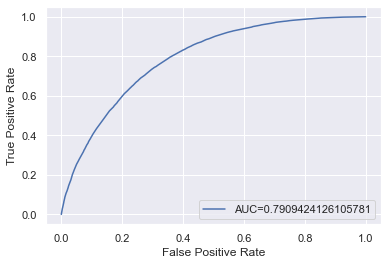

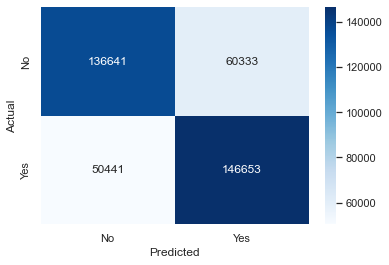

Accuracy: 0.7188962311073216
Precision: 0.7085165180253737
Recall: 0.7440764305356835
F1-Score: 0.725861215600871


In [131]:
ada = AdaBoostClassifier(n_estimators=40, random_state=0)
evaluate(ada, X_train, y_train, X_val, y_val)

#### Random Forest Oversampling

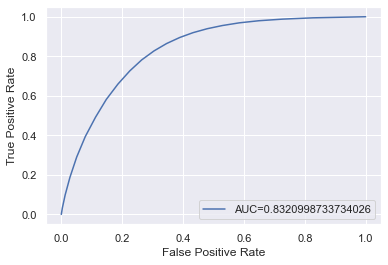

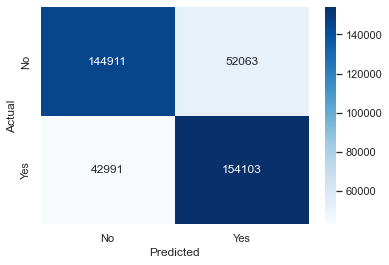

Accuracy: 0.7587878234213384
Precision: 0.7474704849490217
Recall: 0.7818756532416005
F1-Score: 0.7642860685413877


In [132]:
rf = RandomForestClassifier(n_estimators = 20, random_state=0)
evaluate(rf, X_train, y_train, X_val, y_val)

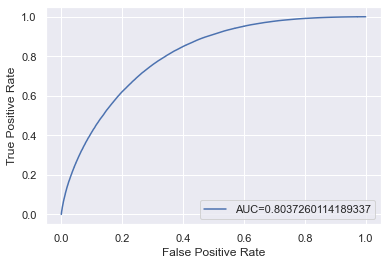

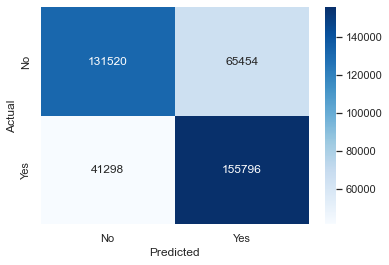

Accuracy: 0.7291025914309206
Precision: 0.7041627118644068
Recall: 0.7904654631800054
F1-Score: 0.7448224427743674


In [133]:
xg = XGBClassifier(n_estimators=40, random_state=0)
evaluate(xg, X_train, y_train, X_val, y_val)

Performance of models on the oversampled data is similar overall to the models using undersampled data. However, the random forest classifier achieved a 0.83 AUC and comparatively higher F1 score. Thus, the random forest algorithm will be tuned further to obtain optimal performance. 

# Entropy vs Gini Loss Criterion

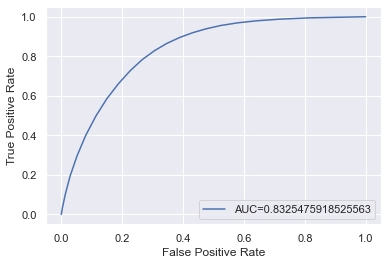

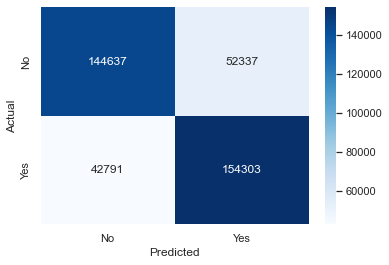

Accuracy: 0.7586000385720231
Precision: 0.7467237708091367
Recall: 0.7828903974753163
F1-Score: 0.7643795172068738


In [134]:
rf2 = RandomForestClassifier(criterion = "entropy", n_estimators = 20, random_state=0)
evaluate(rf2, X_train, y_train, X_val, y_val)

Unable to do gridsearch due to long runtime for 20 estimators. With more resources, I would have checked the different combinations of hyperparamters for an optimal model, instead of tuning one hyperparameter at a time.

Entropy performed basically identical to gini... we will continue with sklearn's default loss (gini)

# Restricting tree depths

In [135]:
tree_depths = [estimator.tree_.max_depth for estimator in rf2.estimators_]
tree_depths

[65,
 69,
 84,
 76,
 74,
 76,
 65,
 64,
 77,
 84,
 84,
 73,
 82,
 73,
 79,
 71,
 77,
 74,
 94,
 77]

Max Depth: 10


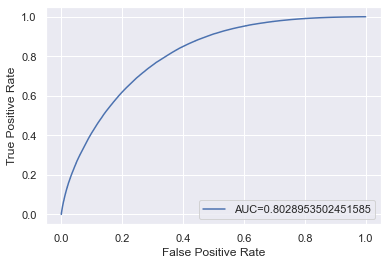

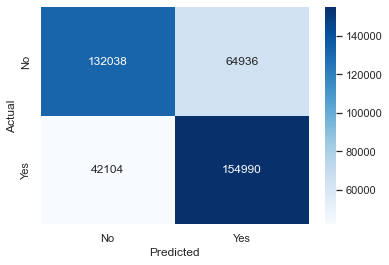

Accuracy: 0.72837175309845
Precision: 0.7047370479161172
Recall: 0.7863760439181304
F1-Score: 0.7433216632295814


Max Depth: 20


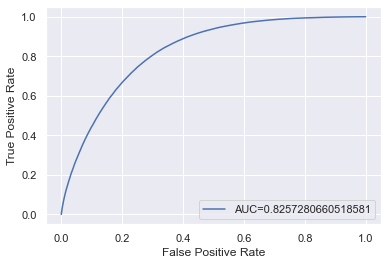

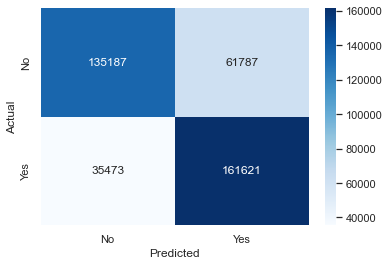

Accuracy: 0.753189804805262
Precision: 0.7234342548163002
Recall: 0.8200198889869809
F1-Score: 0.7687050239951296


Max Depth: 30


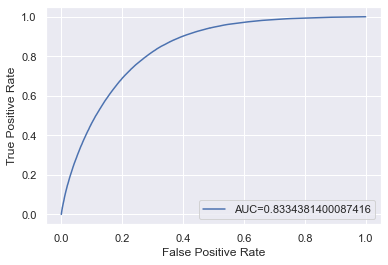

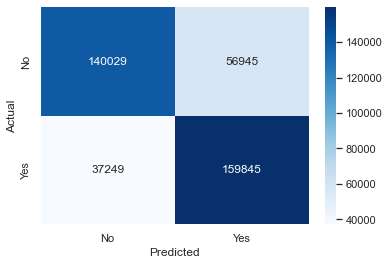

Accuracy: 0.7609701878863546
Precision: 0.7373264449467226
Recall: 0.8110089601915837
F1-Score: 0.7724144929497154


Max Depth: 40


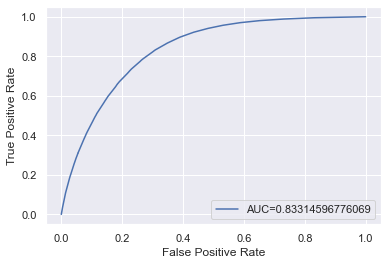

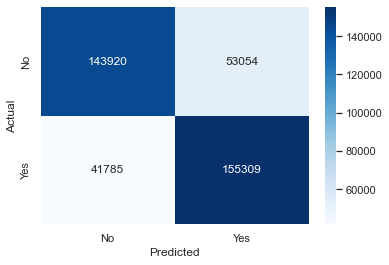

Accuracy: 0.7593334145375925
Precision: 0.745377058306897
Recall: 0.7879945609709073
F1-Score: 0.7660935684918497


Max Depth: 50


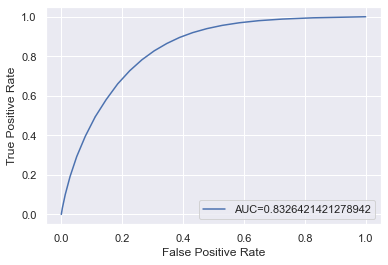

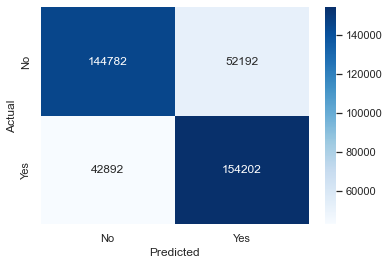

Accuracy: 0.7587116944283727
Precision: 0.7471244319117804
Recall: 0.7823779516372898
F1-Score: 0.7643449123641843


Max Depth: 60


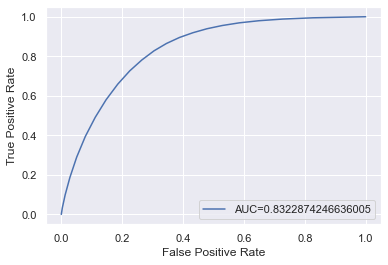

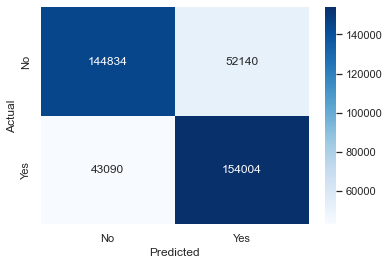

Accuracy: 0.7583411999959397
Precision: 0.7470700093138777
Recall: 0.7813733548459111
F1-Score: 0.7638367415769348




In [138]:
for i in range (10, 70, 10):
    print (f"Max Depth: {i}")
    rf3 = RandomForestClassifier(max_depth = i, n_estimators = 20, random_state=0)
    evaluate(rf3, X_train, y_train, X_val, y_val)
    print("\n")

Due to the importance of recall, max depth of 30 is selected. Best F1 score and high recall.

# Different thresholds 

In [140]:
rf_final = RandomForestClassifier(max_depth = 30, criterion = "gini", n_estimators = 20, random_state=0)
   
rf_final.fit(X_train, y_train)
    
for threshold in np.arange(0.1,1.0,0.1):
    print(f"\n Threshold: {round(threshold,1)} \n")

    probs = rf_final.predict_proba(X_val)
    pos_probs = probs [:, 1]
    
    y_hat = (pos_probs >= threshold).astype(int)
    calc_metrics(y_val, y_hat)


 Threshold: 0.1 

Accuracy: 0.6360196717317823
Precision: 0.5800062620208436
Recall: 0.9868793570580535
F1-Score: 0.7306164534068051

 Threshold: 0.2 

Accuracy: 0.6968061349817798
Precision: 0.6279361102411525
Recall: 0.9664170395851726
F1-Score: 0.7612468502025262

 Threshold: 0.3 

Accuracy: 0.7372839205416324
Precision: 0.6713123338435512
Recall: 0.930145006950998
F1-Score: 0.7798119868986346

 Threshold: 0.4 

Accuracy: 0.7547326857293665
Precision: 0.7012752791426533
Recall: 0.8877895826356966
F1-Score: 0.7835865009135528

 Threshold: 0.5 

Accuracy: 0.761036166346925
Precision: 0.7348621759766338
Recall: 0.8169858037281703
F1-Score: 0.7737510030897566

 Threshold: 0.6 

Accuracy: 0.7480663235786718
Precision: 0.7693040466501841
Recall: 0.7088546581834049
F1-Score: 0.7378433117419811

 Threshold: 0.7 

Accuracy: 0.7059898291665397
Precision: 0.806293737934363
Recall: 0.5424873410656844
F1-Score: 0.6485917586183887

 Threshold: 0.8 

Accuracy: 0.6355755859394825
Precision: 0.8448

Since high F1 is important while maintaining high recall, a threshold of 0.4 is chosen. False negatives are more important to avoid in this case than false positives

# Performance on Test Set

### FINAL MODEL:
    
    Classifier: Random Forest
    Max Depth: 30
    Criterion: Gini
    Threshold: 0.4

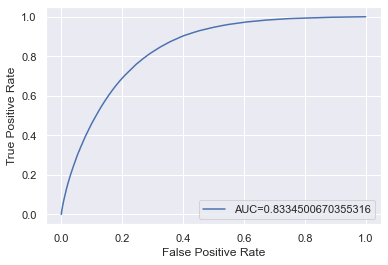

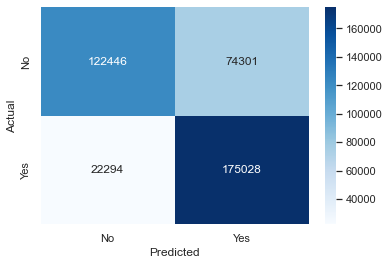

Accuracy: 0.7548779528458214
Precision: 0.7019961576872326
Recall: 0.8870171597693111
F1-Score: 0.7837349518975665


In [141]:
probs = rf_final.predict_proba(X_test)
pos_probs = probs [:, 1]
    
y_hat = (pos_probs >= 0.4).astype(int)

display_roc(y_test, pos_probs)
display_confusion(y_test, y_hat)
calc_metrics(y_test, y_hat)

# Analysis

Overall, the model finished with a recall of 0.88, F1-score of 0.78, and precision of 0.70 on the test set.

An AUC of 0.83 suggests the model has a strong ability to distinguish the negative class from the positive class

Recall was given more emphasis because, as mentioned, false negatives (predicting an individual to not have diabetes) are more costly than false positives (predicting an individual to have diabetes when they do not).

The confusion matrix on the test set is healthy, as the majority of subjects are classified correctly.

With more computational resources, I would have tried to utilize more resampling techniques, build more complex classifiers, and assess various model-specific parameters.